# Client Scenario

This project analyzes housing price determinants in **Taipei** and **Boston** using hedonic pricing models to understand how different factors influence property values across these two distinct urban contexts.

**Research Objectives:**
- Compare structural attribute premiums (rooms, age) between Taipei and Boston markets
- Analyze spatial price variations within Taipei using grid-based fixed effects
- Examine the relationship between accessibility and housing prices in both cities
- Identify other factors driving housing value differences

**Datasets:**
- **Taipei Data**: House prices, age, distance to MRT stations, convenience stores, coordinates
- **Boston Data**: Median home values (MEDV), crime rates, air quality (NOX), distance to employment centers (DIS), rooms (RM), age, pupil-teacher ratio (PTRATIO), lower status population (LSTAT), Charles River proximity (CHAS)


# **Main Point**

Build a unified, reusable hedonic pipeline to quantify how accessibility (distance to jobs/transit) is capitalized into housing prices and to compare adjusted price levels across areas after controlling for structure.

## **Theoretical Analysis**

**What problem are we solving?**

Housing is a differentiated bundle of attributes—structure (size, rooms), neighborhood (school quality, socioeconomics), environment (air, water, green space), and accessibility (jobs, transit). Market prices reveal how buyers implicitly value each attribute. Our task is to recover those implicit prices from observed transactions.

**Core idea (Hedonic price function)**

In competitive equilibrium, the price of dwelling i can be expressed as:
P_i = f(S_i, N_i, E_i, A_i) + epsilon_i,
where S_i are structural features, N_i are neighborhood characteristics, E_i is environmental quality, A_i is accessibility, and epsilon_i is an idiosyncratic error. A common, interpretable specification uses the natural log of price:
ln(P_i) = b0 + bS * S_i + bN * N_i + bE * E_i + bA * A_i + u_i.
In this log model, a coefficient times 100 percent approximates the percent change in price for a one-unit change in the attribute.

**Economic Meaning of Coefficients**

Under the hedonic framework, the derivative of the price function with respect to an attribute equals its marginal implicit price: the amount buyers are willing to pay, at the observed equilibrium, for a marginal improvement in that attribute, holding others constant. These implicit prices translate directly into policy-relevant valuations (for example, the premium for water amenities or the discount from local pollution).

**Identification Logic**:

We control for key confounding factors such as the number of rooms, housing age, accessibility (distance to employment centers or MRT stations), and neighborhood indicators like pupil–teacher ratio, crime rate, and lower-status population.
Individual housing prices do not influence these attributes, so they can be treated as given in the short term.
To capture possible nonlinear relationships, we use different approaches across cities: Partial Dependence Plots (PDPs) for Boston to visualize marginal effects, and scatter plots with grid fixed effects for Taipei to reflect spatial differences.

**Potential Issues**:

Some unobserved factors—such as school reputation or neighborhood safety—may still affect both accessibility and price. To reduce this bias, we include relevant observable proxies (e.g., PTRATIO, CRIM, LSTAT) and grid-level fixed effects for Taipei to absorb location-specific variation.

**Baseline Framework**:

Both city models share the same idea: housing price is determined by structure, accessibility, and neighborhood quality.

1. In Taipei, accessibility to MRT stations and housing age play dominant roles, with grid fixed effects capturing location premiums.

2. In Boston, the model includes room numbers, distance to employment centers, and community indicators (PTRATIO, LSTAT, CRIM), and PDPs help visualize how these features influence housing values.

Overall, the analysis compares how accessibility and structure shape housing prices under two different urban systems


## **Study Scope**
The dataset is mainly about the Boston Housing and Taipei Housing cross-section. Therefore the majortity of our research centers on structural drives of house prices(MEDV):direction, strength, and stability of relationships, with robust diagonstics and model comparison

**In terms of Boston**:

1.Number of Instances: 506

2.Number of Attributes: 13 continuous attributes (including "class",attribute "MEDV"), 1 binary-valued attribute.

3.Attribute Information:

    a. CRIM per capita crime rate by town

    b. ZN proportion of residential land zoned for lots over 25,000 sq.ft.

    c. INDUS proportion of non-retail business acres per town

    d. CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

    e. NOX nitric oxides concentration (parts per 10 million)

    f. RM average number of rooms per dwelling

    g. AGE proportion of owner-occupied units built prior to 1940

    h. DIS weighted distances to five Boston employment centres

    i. RAD index of accessibility to radial highways

    j. TAX full-value property-tax rate per $10,000

    k. PTRATIO pupil-teacher ratio by town

    l. B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

    m. LSTAT % lower status of the population

    n. MEDV Median value of owner-occupied homes in $1000's

**In terms of Taipei**:

The Real Estate Valuation Data Set contains 414 records of residential property transactions collected from the Sindian District of New Taipei City, Taiwan (China). Each record describes various housing attributes such as age, location, and neighborhood convenience, along with the house price per unit area. This dataset is widely used for regression analysis and modeling of housing price determinants in urban areas.

Variable explanations:

	a.	X1 – Transaction date: the time of the property transaction (e.g., 2013.250 ≈ March 2013, 2013.500 ≈ June 2013).

	b.	X2 – House age: the age of the house in years.

	c.	X3 – Distance to the nearest MRT station: the distance (in meters) from the house to the closest metro station.

	d.	X4 – Number of convenience stores: the count of convenience stores within walking distance, reflecting neighborhood accessibility and commercial density.

	e.	X5 – Latitude: the geographic latitude of the property.

	f.	X6 – Longitude: the geographic longitude of the property.

	g.	Y – House price of unit area: the target variable, representing the property price per unit area (measured in 10,000 New Taiwan Dollars per Ping, 1 Ping ≈ 3.3 m²).

In [ ]:
!pip install ucimlrepo

In [2]:
# Unified Data Import - Project Start
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from pathlib import Path
import kagglehub
from ucimlrepo import fetch_ucirepo

# Import Taiwan data (using Q3 variable naming standard)
real_estate_valuation = fetch_ucirepo(id=477)
X_taiwan = real_estate_valuation.data.features
y_taiwan = real_estate_valuation.data.targets

# Import Boston data (using Q3 variable naming standard)
kg_path = kagglehub.dataset_download("arslanali4343/real-estate-dataset")
whole_data = pd.read_csv(Path(kg_path) / "data.csv")

# Create Boston data features and target variables
cols = ['CRIM', 'NOX', 'DIS', 'CHAS', 'RM','LSTAT','PTRATIO','MEDV']
X = whole_data[cols].drop("MEDV", axis=1)
y = whole_data["MEDV"]

# Create merged version of Taiwan data
Taiwan = pd.concat([X_taiwan, y_taiwan], axis=1)

print(Taiwan.head())
print(whole_data.head())


100%|██████████| 11.7k/11.7k [00:00<00:00, 4.84MB/s]

Extracting files...
   X1 transaction date  X2 house age  X3 distance to the nearest MRT station  \
0             2012.917          32.0                                84.87882   
1             2012.917          19.5                               306.59470   
2             2013.583          13.3                               561.98450   
3             2013.500          13.3                               561.98450   
4             2012.833           5.0                               390.56840   

   X4 number of convenience stores  X5 latitude  X6 longitude  \
0                               10     24.98298     121.54024   
1                                9     24.98034     121.53951   
2                                5     24.98746     121.54391   
3                                5     24.98746     121.54391   
4                                5     24.97937     121.54245   

   Y house price of unit area  
0                        37.9  
1                        42.2  
2           

# Driving Questions
1) **What products dominate the marketplace?**  
   Which **structural attributes** (size/rooms/age) carry the highest **marginal premiums** within each city?  
   *Outputs:* Hedonic coefficient table (percent effects) and side-by-side bar chart (Taipei vs. Boston).

2) **How do prices compare by municipality after controls?**  
   After controlling for structure and accessibility, which **municipalities/areas** are relatively **expensive vs. affordable**?  
   *Outputs:* Fixed-effect (or grid FE) estimates / residual maps or ranked bar chart of adjusted price levels.

3) **What feature makes the biggest difference -- Multi-factor Analysis of Housing?**  

   Which factors have the strongest influence on housing prices, and how do they interact?  
   - Examine accessibility (distance to employment centers), environmental quality (air pollution), and neighborhood characteristics
    - Analyze factor correlations and partial dependence relationships
    - *Method:* Correlation analysis, partial dependence plots, and factor importance assessment (Taipei) and scatter plots (Boston).


# **Question 1**


Structural marginal premiums (percent effects; log-price model):
  city     attribute   pct  ci_low  ci_high
Boston    Rooms (+1) 14.92    8.32    21.52
Boston Age (+10 yrs) -0.69   -2.68     1.30
Taipei Age (+10 yrs) -6.50   -8.46    -4.54


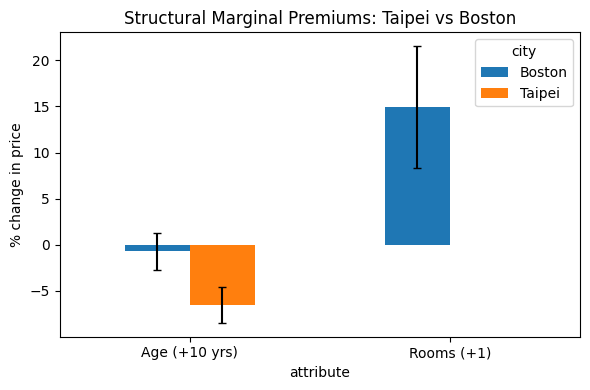

In [3]:
# Q1 Analysis - Using unified data variables
# Create analysis dataframes from unified imported data

# Boston data processing
bos = whole_data.copy()
bos = bos.rename(columns={
    'MEDV':'unit_price','RM':'RM','AGE':'AGE','DIS':'DIS',
    'NOX':'NOX','PTRATIO':'PTRATIO','LSTAT':'LSTAT'
})
bos['city'] = 'Boston'

# Taiwan data processing
tpe = Taiwan.copy()
tpe = tpe.rename(columns={
    'X2 house age': 'AGE',
    'X3 distance to the nearest MRT station': 'DIS',
    'X4 number of convenience stores': 'STORES',
    'X5 latitude': 'lat',
    'X6 longitude': 'lon',
    'Y house price of unit area': 'unit_price'
})
tpe['city'] = 'Taipei'
tpe['RM'] = np.nan  # Taipei has no room count

# Combine data and clean
keep = ['unit_price','AGE','RM','DIS','NOX','PTRATIO','LSTAT','STORES','city']
for c in keep:
    if c not in bos.columns: bos[c] = np.nan
    if c not in tpe.columns: tpe[c] = np.nan
df = pd.concat([tpe[keep], bos[keep]], ignore_index=True)

df = df.replace([np.inf,-np.inf], np.nan).dropna(subset=['unit_price','AGE','DIS'])
df = df[(df['unit_price']>0) & (df['DIS']>0)].copy()
df['ln_price'] = np.log(df['unit_price'])
df['AGE10'] = df['AGE']/10.0

for c in ['ln_price','AGE10','DIS','RM','NOX','PTRATIO','LSTAT','STORES']:
    if c in df.columns and df[c].notna().any():
        lo, hi = df[c].quantile([0.01, 0.99])
        df[c] = df[c].clip(lo, hi)

#City-by-city OLS (HC1 SE)
def run_city(sub, label):
    rhs = ['AGE10','DIS']  # control accessibility
    if sub['RM'].notna().any(): rhs.insert(0,'RM')  # Rooms as structural if available
    for z in ['NOX','PTRATIO','LSTAT','STORES']:
        if z in sub.columns and sub[z].notna().any():
            rhs.append(z)
    model = smf.ols('ln_price ~ ' + ' + '.join(rhs), data=sub).fit(cov_type='HC1')
    rows = []
    if 'RM' in model.params:
        rows.append({'city':label,'attribute':'Rooms (+1)',
                     'pct':model.params['RM']*100,'se':model.bse['RM']*100})
    rows.append({'city':label,'attribute':'Age (+10 yrs)',
                 'pct':model.params['AGE10']*100,'se':model.bse['AGE10']*100})
    return pd.DataFrame(rows), model

out_list, models = [], {}
for city, sub in df.groupby('city', dropna=True):
    res, m = run_city(sub, city)
    out_list.append(res); models[city]=m

out = pd.concat(out_list, ignore_index=True)
out['ci_low']  = out['pct'] - 1.96*out['se']
out['ci_high'] = out['pct'] + 1.96*out['se']

print("\nStructural marginal premiums (percent effects; log-price model):")
print(out[['city','attribute','pct','ci_low','ci_high']].round(2).to_string(index=False))

#Bar chart with 95% CI (side-by-side)
pivot_pct = out.pivot(index='attribute', columns='city', values='pct')
pivot_se  = out.pivot(index='attribute', columns='city', values='se')*1.96
ax = pivot_pct.plot(kind='bar', yerr=pivot_se, capsize=3, rot=0, figsize=(6,4))
ax.set_ylabel('% change in price'); ax.set_title('Structural Marginal Premiums: Taipei vs Boston')
plt.tight_layout(); plt.show()


## **Summary (Q1)**

Boston: Adding one room commands a ~15% premium, while the age penalty is small and statistically indistinguishable from zero after controls.
Interpretation: Buyers strongly value interior space/bedroom count; the market tolerates older stock if location and neighborhood attributes are good—consistent with a historic housing stock and tight zoning.

Taipei: Every +10 years of age reduces unit price by ~6.5%.
Interpretation: A strong newness premium—plausibly driven by cultural preference for newer condos, stricter/updated building codes (earthquake resilience), HOA/maintenance quality, and financing practices favoring newer buildings.

Product strategy:

Boston—projects that reconfigure/add a bedroom likely deliver outsized returns.

Taipei—renewal/new-build and visible quality upgrades matter more than adding rooms.



# **Question 2**


Top 10 (adjusted price % vs city mean; controls: AGE, DIS, STORES)
   grid_id  adj_level_pct  n
2500_12152          93.58  2
2493_12151          91.64  2
2495_12148          88.79  2
2496_12148          87.79  1
2494_12148          78.20  1
2496_12150          75.12  1
2501_12152          71.83  1
2496_12147          64.21  1
2493_12152          62.24  1
2495_12150          46.39 10

Bottom 10
   grid_id  adj_level_pct  n
2498_12153          -6.64 15
2497_12153          -8.75 23
2497_12152         -15.66 10
2495_12155         -17.54 17
2496_12154         -19.98 19
2497_12151         -23.07  3
2495_12154         -23.12  4
2496_12153         -34.82  2
2496_12155         -38.42  9
2495_12153         -66.77  7


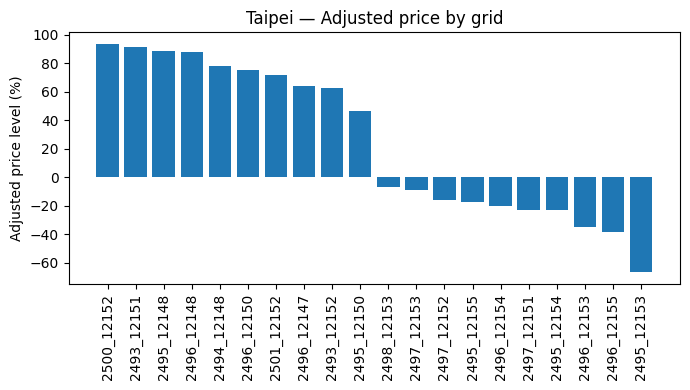

In [4]:
# Q2 Analysis - Using unified data variables
# Create analysis dataframes from unified imported data
tpe = Taiwan.copy().rename(columns={
    'X2 house age':'AGE','X3 distance to the nearest MRT station':'DIS',
    'X4 number of convenience stores':'STORES','X5 latitude':'lat','X6 longitude':'lon',
    'Y house price of unit area':'unit_price'
})

#Clean + transforms
tpe = (tpe.replace([np.inf,-np.inf], np.nan)
          .dropna(subset=['unit_price','AGE','DIS','lat','lon']))
tpe = tpe[(tpe.unit_price>0) & (tpe.DIS>0)].copy()
tpe['ln_price'] = np.log(tpe['unit_price'])
tpe['AGE10'] = tpe['AGE']/10.0

#Build ~1km grids
grid_deg = 0.01  # ≈ 1km
tpe['grid_id'] = ((tpe['lat']/grid_deg).round().astype(int).astype(str) + '_' +
                  (tpe['lon']/grid_deg).round().astype(int).astype(str))

#OLS with grid fixed effects (cluster SE by grid)
m = smf.ols("ln_price ~ AGE10 + DIS + STORES + C(grid_id)", data=tpe)\
      .fit(cov_type='cluster', cov_kwds={'groups': tpe['grid_id']})

#Extract grid FE → center to city mean → % scale
levels = tpe['grid_id'].astype(str).unique()
counts = tpe['grid_id'].value_counts()
fe = {g: m.params.get(f"C(grid_id)[T.{g}]", 0.0) for g in levels}  # base grid = 0
wmean = sum(fe[g]*counts[g] for g in levels)/counts.sum()
adj_pct = {g: (fe[g]-wmean)*100 for g in levels}

out = (pd.DataFrame({'grid_id': list(adj_pct.keys()),
                     'adj_level_pct': list(adj_pct.values()),
                     'n': [counts[g] for g in adj_pct.keys()]})
         .sort_values('adj_level_pct', ascending=False))

print("Top 10 (adjusted price % vs city mean; controls: AGE, DIS, STORES)")
print(out.head(10).round(2).to_string(index=False))
print("\nBottom 10")
print(out.tail(10).round(2).to_string(index=False))

#Ranked bar chart (Top/Bottom 10)
rank = pd.concat([out.head(10), out.tail(10)])
plt.figure(figsize=(7,4))
plt.bar(rank['grid_id'], rank['adj_level_pct'])
plt.xticks(rotation=90); plt.ylabel('Adjusted price level (%)')
plt.title('Taipei — Adjusted price by grid')
plt.tight_layout(); plt.show()


## **Summary(Q2)**
After removing the effects of structure (age), accessibility (distance to MRT), and local retail density, the grid fixed effects show pure location price levels: positive values = premium areas, negative = discount areas relative to the city mean.

The ranking displays a clear spatial gradient: inner-core and mixed-use pockets cluster on the premium side, while peripheral grids concentrate on the discount side. Because MRT distance is already controlled, these residual premiums likely reflect unobserved neighborhood amenities—school catchments, building quality/management, views, local safety, urban design, and scarcity created by zoning or renewal constraints.

The age penalty is already netted out, so premiums are not just “newer buildings”; they are place effects—reputation and amenity bundles that buyers pay for even holding age and access constant.

**Implications**

Go-to markets: prioritize top-ranked grids for new launches or price leadership.

Value-add: use bottom-ranked grids for renovation/amenity upgrades or entry-level products; uplift hinges on improving micro-amenities rather than access alone.

Policy: place-based investments (streetscape, schools, safety) should target discounted grids; enable additional supply in premium grids to ease capitalized rents.

# **Question 3**

In [5]:
Taiwan = pd.concat([X_taiwan, y_taiwan], axis=1)
Taiwan

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [6]:

print(whole_data.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [7]:
print(X.head())

      CRIM    NOX     DIS  CHAS     RM  LSTAT  PTRATIO
0  0.00632  0.538  4.0900     0  6.575   4.98     15.3
1  0.02731  0.469  4.9671     0  6.421   9.14     17.8
2  0.02729  0.469  4.9671     0  7.185   4.03     17.8
3  0.03237  0.458  6.0622     0  6.998   2.94     18.7
4  0.06905  0.458  6.0622     0  7.147   5.33     18.7


We find that Boston and Taipei share many similarities in terms of accessibility, though there are also notable differences. Therefore, we prepared a comparative analysis to highlight these distinctions. For Boston, we use Partial Dependence Plots (PDPs) to examine how each individual factor affects MEDV (median house value). In contrast, for the Taipei dataset, we employ scatter plots to visually assess the relationship between each single factor and housing prices.

In [ ]:
#Self-contained PDP curvature plot (builds `pre` if missing)
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

#Ensure X, y exist
assert 'X' in globals() and 'y' in globals(), "Please load df/X/y first."

#Ensure a preprocessing pipeline `pre` exists (build if missing)
if 'pre' not in globals():
    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import OneHotEncoder, StandardScaler
    from sklearn.impute import SimpleImputer
    num = X.select_dtypes(include="number").columns.tolist()
    cat = X.select_dtypes(exclude="number").columns.tolist()
    pre = ColumnTransformer([
        ("num", Pipeline([("imp", SimpleImputer(strategy="median")),
                          ("sc", StandardScaler())]), num),
        ("cat", Pipeline([("imp", SimpleImputer(strategy="most_frequent")),
                          ("oh", OneHotEncoder(handle_unknown="ignore"))]), cat)
    ])

#Get an estimator: prefer tuned model g.best_estimator_, else quick GBDT+pre
if 'g' in globals() and hasattr(g, "best_estimator_"):
    est = g.best_estimator_
else:
    from sklearn.ensemble import GradientBoostingRegressor
    est = Pipeline([("pre", pre), ("reg", GradientBoostingRegressor(random_state=42))])
    est.fit(X, y)

#PDP function (1D) + curvature judge
def pdp_1d(model, X, feature, grid_pts=60):
    lo, hi = X[feature].quantile(0.01), X[feature].quantile(0.99)
    xs = np.linspace(lo, hi, grid_pts)
    X_rep = X.copy()
    preds = []
    for v in xs:
        X_rep[feature] = v
        preds.append(model.predict(X_rep).mean())
    return xs, np.array(preds)

def curvature_label(x, yhat):
    #cubic fit -> second derivative sign
    a, b, c, d = np.polyfit(x, yhat, deg=3)
    sec = 6*a*x + 2*b
    neg_ratio = (sec < 0).mean()
    pos_ratio = (sec > 0).mean()
    if neg_ratio >= 0.8: return f"Concave (curvature<0 in {neg_ratio:.0%})"
    if pos_ratio >= 0.8: return f"Convex (curvature>0 in {pos_ratio:.0%})"
    return f"Mixed curvature (neg {neg_ratio:.0%}, pos {pos_ratio:.0%})"

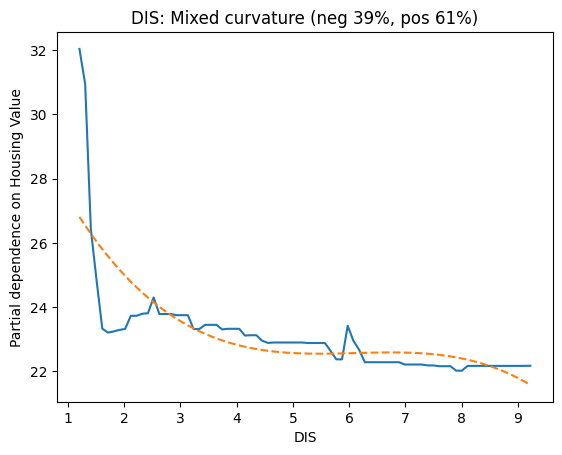

In [ ]:
# Boston
feat = "DIS"
xs, pdp = pdp_1d(est, X, feat, grid_pts=80)
tag = curvature_label(xs, pdp)

plt.figure()
plt.plot(xs, pdp)
z = np.polyfit(xs, pdp, deg=3)
p = np.poly1d(z)
plt.plot(xs, p(xs), linestyle="--")
plt.xlabel(feat)
plt.ylabel("Partial dependence on Housing Value")
plt.title(f"{feat}: {tag}")
plt.show()





The partial dependence plot for DIS shows a strongly negative yet slightly mixed-curvature relationship with MEDV (median house value). At low DIS values (below 2), housing prices are highest, suggesting that properties located close to Boston’s main employment and business centers command a premium due to their superior accessibility and convenience. As DIS increases from 2 to around 5, MEDV steadily declines, reflecting the cost of longer commuting distances and weaker access to urban amenities. This trend supports a classic urban land-value gradient—the farther from the city’s economic core, the lower the property value. Beyond DIS ≈ 5, the curve flattens, indicating that the marginal impact of additional distance becomes weaker. Once a property is already far from job centers, a further increase in distance does not substantially reduce value, as these areas likely share similar suburban characteristics (lower density, quieter environments, but limited access). There is also a minor fluctuation around DIS ≈ 6, possibly due to specific suburban clusters where moderate accessibility coexists with good living environments, creating local price stabilization.


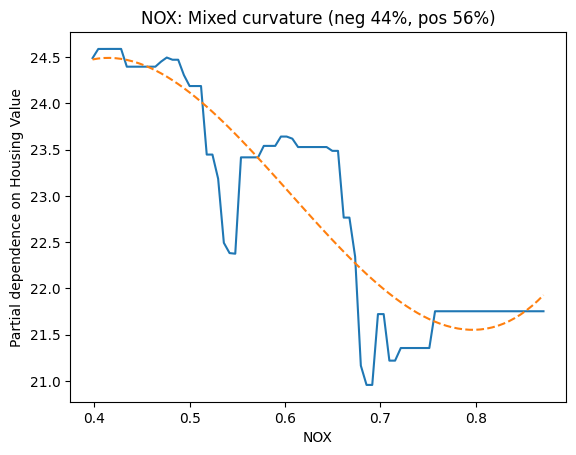

In [ ]:

feat = "NOX"
xs, pdp = pdp_1d(est, X, feat, grid_pts=80)
tag = curvature_label(xs, pdp)

plt.figure()
plt.plot(xs, pdp)
z = np.polyfit(xs, pdp, deg=3)
p = np.poly1d(z)
plt.plot(xs, p(xs), linestyle="--")
plt.xlabel(feat)
plt.ylabel("Partial dependence on Housing Value")
plt.title(f"{feat}: {tag}")
plt.show()

The partial dependence plot for NOX reveals a nonlinear and mixed-curvature relationship with MEDV (median house value). When NOX levels are low (below around 0.5), housing prices are the highest, suggesting that suburban areas with clean air and better environmental quality attract higher-value properties. These neighborhoods likely represent wealthier, low-density residential zones, where a pleasant living environment and larger properties drive up MEDV. Between approximately 0.5 and 0.65, MEDV begins to decline gradually, reflecting increasing exposure to pollution and a shift from purely residential suburbs toward more mixed-use or industrial-influenced areas. Beyond NOX ≈ 0.65, housing prices drop sharply, likely indicating regions with heavy industrial activity or dense traffic where pollution levels are severe and environmental quality is poor. When NOX exceeds 0.7, however, MEDV shows a minor rebound, possibly due to central urban districts where location advantages—such as proximity to workplaces, commercial centers, and transportation—offset poor air conditions and sustain higher prices.

Interestingly, around NOX ≈ 0.55–0.6, there is a brief local dip in MEDV. Considering the observed relationship between DIS and NOX, we speculate that this interval might represent transitional zones—neither in the clean, high-end suburbs nor in the highly accessible city core. These mid-distance neighborhoods may suffer from intermediate disadvantages: pollution higher than in outer residential areas but without the full benefits of central convenience. As a result, the overall perceived value is lower, leading to a short-lived decline in housing prices. Although this interpretation remains speculative, the localized fluctuation is intriguing and worth further investigation.

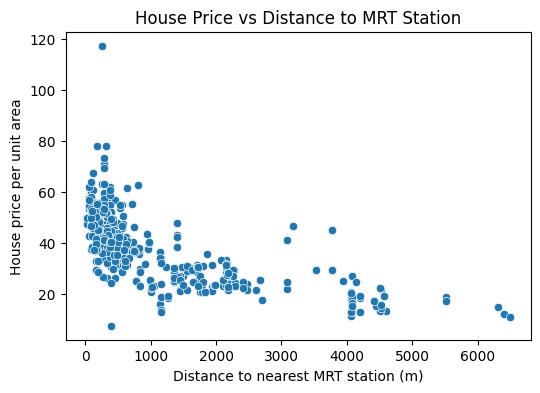

In [ ]:
# Using Taiwan data to analyze people's preferences for transportation convenience
plt.figure(figsize=(6, 4))
sns.scatterplot(x='X3 distance to the nearest MRT station',
                y='Y house price of unit area',
                data=Taiwan)
plt.title('House Price vs Distance to MRT Station')
plt.xlabel('Distance to nearest MRT station (m)')
plt.ylabel('House price per unit area')
plt.show()



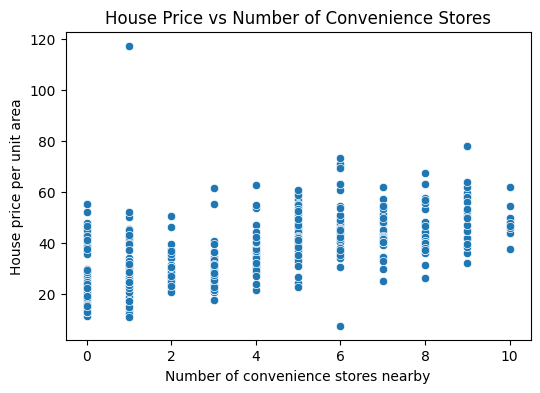

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='X4 number of convenience stores',
                y='Y house price of unit area',
                data=Taiwan)
plt.title('House Price vs Number of Convenience Stores')
plt.xlabel('Number of convenience stores nearby')
plt.ylabel('House price per unit area')
plt.show()

In the Taiwan region of China, two variables were selected to represent spatial accessibility and urban convenience in the housing dataset:

**1**.Distance to the nearest MRT station, serving as a proxy for transport accessibility (analogous to the DIS variable in the Boston dataset).

**2**.Number of convenience stores, representing the density of local amenities and commercial activity.

From the scatter plots, two clear patterns can be observed:

**1**.Housing prices decline as the distance to MRT stations increases. Properties within 0 - 1000 meters of a station tend to be much more expensive, while prices drop sharply beyond that range. This demonstrates that accessibility to public transportation is a key determinant of housing value in the Taiwan region of China.

**2**.The number of convenience stores is positively correlated with housing prices. Areas with denser commercial services and amenities tend to have higher prices, reflecting residents' preference for convenience-oriented urban living.

In contrast, the Boston dataset shows a different relationship between housing prices and the DIS variable (distance to employment centers):

**1**.Prices are higher near the city center (low DIS values) but the decline in price with increasing distance is relatively mild, stabilizing beyond DIS ≈ 2 - 3.

**2**.This pattern reflects the polycentric and suburbanized nature of many American cities, where middle- and upper-income families often prefer to live in low-density suburban neighborhoods with better environments, even if they face longer commutes.

Overall, the spatial housing patterns of Taiwan (China) and Boston (U.S.) illustrate distinct urban structures and cultural preferences:

**1**.Taiwan(China) exhibits a transit-oriented, monocentric urban structure, where housing prices are strongly shaped by public transport accessibility and urban convenience.

**2**.Boston(U.S.) represents a car-oriented, polycentric urban model, where price gradients flatten with distance and depend more on environmental quality and neighborhood characteristics.

In short, the Taiwan region of China demonstrates a high-density, transport-driven urban lifestyle, while Boston reflects a low-density, suburban residential culture.

### **Variable summary table: Linearity/Monotonicity Intensity**
Afterward, we focus on the Boston case in greater depth, using PDPs to discuss how different factors separately influence housing values.

In [8]:
# Data Health Check - Using unified variables
# X and y were created in the unified import section above
X = X.dropna()
y = y.loc[X.index]

basic_info = pd.DataFrame({
    "dtype": X.dtypes.astype(str),
    "n_missing": X.isna().sum(),
    "n_unique": X.nunique(dropna=True)
}).sort_index()

print("Basic info:")
display(basic_info.head(20))


Basic info:


,dtype,n_missing,n_unique
CHAS,int64,0,2
CRIM,float64,0,504
DIS,float64,0,412
LSTAT,float64,0,456
NOX,float64,0,82
PTRATIO,float64,0,47
RM,float64,0,444


In [9]:
#Correlation Summary
import numpy as np

num_cols = X.select_dtypes(include="number").columns.tolist()
num_cols = [c for c in num_cols if c != "MEDV"]

pear  = {c: np.corrcoef(X[c].to_numpy(), y.to_numpy())[0, 1] for c in num_cols}
spear = {c: pd.Series(X[c]).corr(y, method="spearman") for c in num_cols}

summary_corr = (pd.DataFrame({"pearson": pear, "spearman": spear})
                .sort_values("spearman", ascending=False))
summary_corr["direction"] = np.where(summary_corr["spearman"] >= 0, "↑", "↓")
summary_corr.round(3)


,pearson,spearman,direction
RM,0.668,0.629,↑
DIS,0.235,0.443,↑
CHAS,0.164,0.137,↑
PTRATIO,-0.451,-0.533,↓
CRIM,-0.382,-0.554,↓
NOX,-0.413,-0.555,↓
LSTAT,-0.563,-0.821,↓


In [10]:
print("\nCorrelation Matrix:")
print(X.corr())


Correlation Matrix:
             CRIM       NOX       DIS      CHAS        RM     LSTAT   PTRATIO
CRIM     1.000000  0.420170 -0.377904 -0.056024 -0.220363  0.406266  0.278265
NOX      0.420170  1.000000 -0.770167  0.090200 -0.301778  0.540542  0.185864
DIS     -0.377904 -0.770167  1.000000 -0.097049  0.199853 -0.470697 -0.237141
CHAS    -0.056024  0.090200 -0.097049  1.000000  0.089952 -0.056881 -0.124780
RM      -0.220363 -0.301778  0.199853  0.089952  1.000000 -0.553126 -0.339755
LSTAT    0.406266  0.540542 -0.470697 -0.056881 -0.553126  1.000000  0.397760
PTRATIO  0.278265  0.185864 -0.237141 -0.124780 -0.339755  0.397760  1.000000


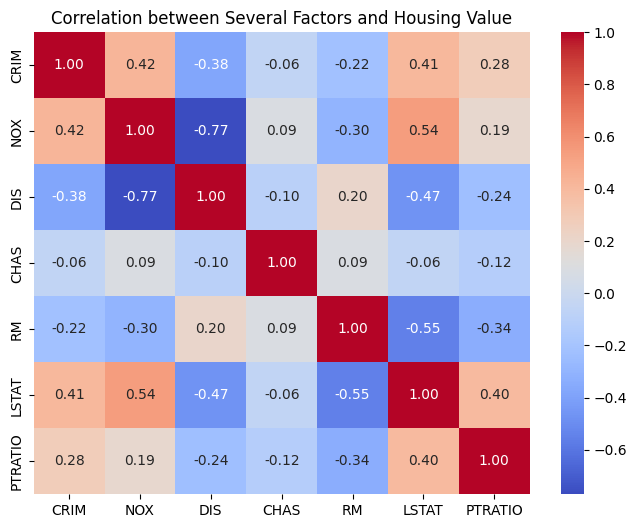

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Several Factors and Housing Value")
plt.show()

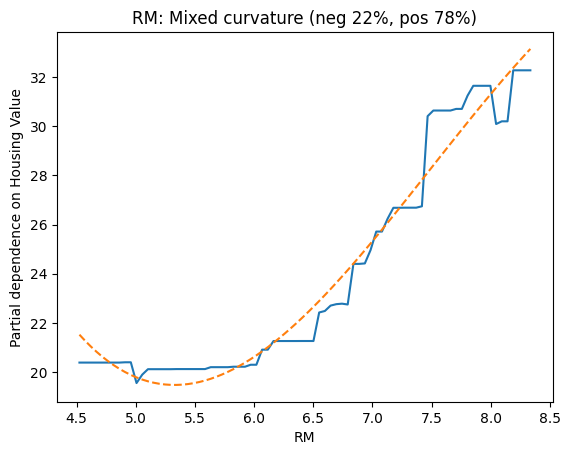

In [17]:
feat = "RM"
xs, pdp = pdp_1d(est, X, feat, grid_pts=80)
tag = curvature_label(xs, pdp)

plt.figure()
plt.plot(xs, pdp)
z = np.polyfit(xs, pdp, deg=3)
p = np.poly1d(z)
plt.plot(xs, p(xs), linestyle="--")
plt.xlabel(feat)
plt.ylabel("Partial dependence on Housing Value")
plt.title(f"{feat}: {tag}")
plt.show()

**RM**:The average number of rooms per dwelling (RM) shows a clear positive relationship with MEDV. As the number of rooms increases, the median home value tends to rise. This trend reflects the transition from small apartments to larger houses or villas, where larger living spaces usually indicate higher property quality and socioeconomic status, resulting in higher market prices.

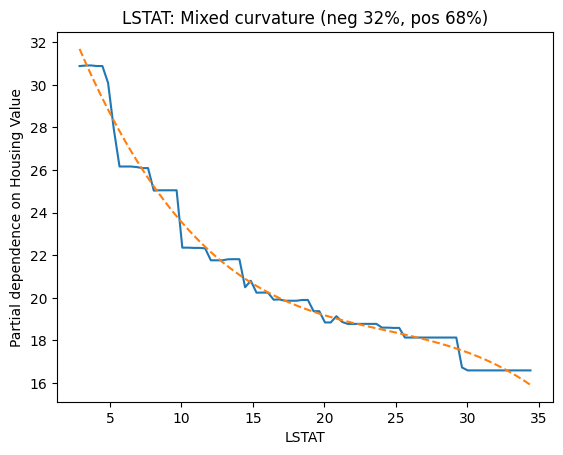

In [18]:
feat = "LSTAT"
xs, pdp = pdp_1d(est, X, feat, grid_pts=80)
tag = curvature_label(xs, pdp)

plt.figure()
plt.plot(xs, pdp)
z = np.polyfit(xs, pdp, deg=3)
p = np.poly1d(z)
plt.plot(xs, p(xs), linestyle="--")
plt.xlabel(feat)
plt.ylabel("Partial dependence on Housing Value")
plt.title(f"{feat}: {tag}")
plt.show()

**LSTAT**:The percentage of lower-status population (LSTAT) is strongly negatively correlated with MEDV. Areas with a higher proportion of low-income residents tend to have lower housing prices. This relationship captures the underlying effects of income inequality and neighborhood quality, where lower social status often corresponds to fewer local amenities, lower school quality, and reduced overall desirability.

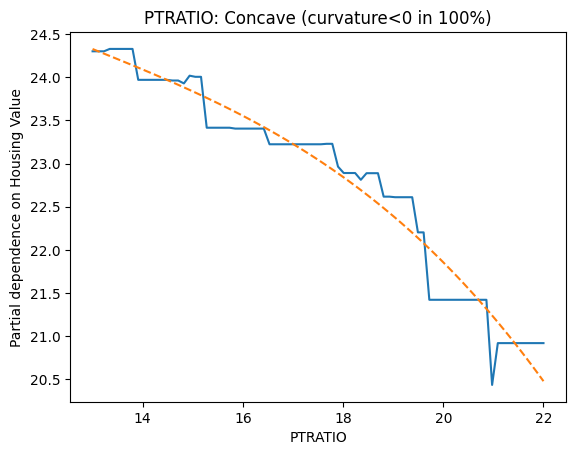

In [19]:
feat = "PTRATIO"
xs, pdp = pdp_1d(est, X, feat, grid_pts=80)
tag = curvature_label(xs, pdp)

plt.figure()
plt.plot(xs, pdp)
z = np.polyfit(xs, pdp, deg=3)
p = np.poly1d(z)
plt.plot(xs, p(xs), linestyle="--")
plt.xlabel(feat)
plt.ylabel("Partial dependence on Housing Value")
plt.title(f"{feat}: {tag}")
plt.show()

**PTRATIO**:The pupil–teacher ratio (PTRATIO) is negatively associated with MEDV. A smaller PTRATIO implies a better education environment with more individual attention per student, which is highly valued by families. Consequently, neighborhoods with stronger educational resources and smaller class sizes tend to exhibit higher property values.

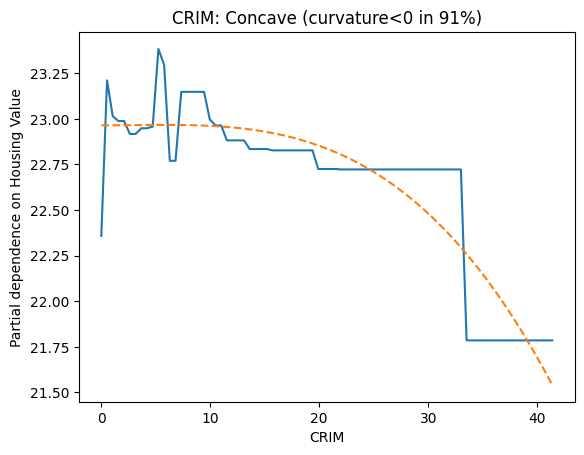

In [20]:
feat = "CRIM"
xs, pdp = pdp_1d(est, X, feat, grid_pts=80)
tag = curvature_label(xs, pdp)

plt.figure()
plt.plot(xs, pdp)
z = np.polyfit(xs, pdp, deg=3)
p = np.poly1d(z)
plt.plot(xs, p(xs), linestyle="--")
plt.xlabel(feat)
plt.ylabel("Partial dependence on Housing Value")
plt.title(f"{feat}: {tag}")
plt.show()

**CRIM**: The partial dependence plot for CRIM shows a clear concave and negative relationship with MEDV . As the crime rate increases, housing prices tend to decrease, suggesting that higher perceived crime risks strongly reduce property desirability. This relationship aligns with well-documented urban economic behavior: neighborhoods with lower crime are generally more stable, safer, and more attractive to high-income residents, thereby commanding higher prices. Conversely, areas with elevated CRIM values may face lower social trust, poorer public security, and potential long-term disinvestment, all of which are capitalized into lower MEDV values. However, it is notable that in the mid-range of CRIM (around 20–30), the curve appears relatively flat, with only limited variation in MEDV. This plateau may reflect a compensation effect within urban centers—regions where crime rates are high but land scarcity and location advantages partially offset the negative perception of safety. In densely built city cores, demand for proximity to employment, public transportation, and amenities remains strong even under higher crime rates, resulting in relatively stable property prices despite social risks.Beyond this range (CRIM > 30), the concave shape steepens again, indicating that once the perceived risk surpasses a tolerable threshold, the price penalty from crime dominates and housing values decline sharply. Overall, the trend underscores that crime rate exerts a strong, nonlinear deterrent effect on housing prices, but its impact is context-dependent—moderated by the trade-off between safety and accessibility in urban versus suburban settings.

Text(0.5, 1.0, 'House Price vs Charles River')

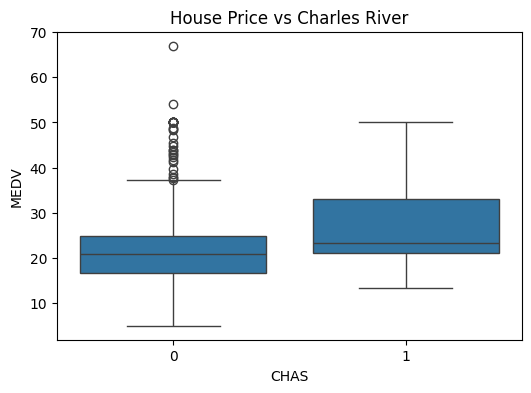

In [21]:
# Use boxplot to analyze the impact of CHAS on housing prices
plt.figure(figsize=(6, 4))
sns.boxplot(x='CHAS', y='MEDV', data=whole_data)
plt.title('House Price vs Charles River')


**CHAS**:The boxplot for CHAS indicates a clear positive relationship between proximity to the Charles River and housing prices (MEDV). Properties adjacent to the river (CHAS = 1) have noticeably higher median and upper-quartile prices compared to inland tracts (CHAS = 0). This suggests a strong environmental amenity effect, where scenic and recreational advantages of waterfront locations are capitalized into property values. The wider spread of prices among river-adjacent homes also implies heterogeneity—some high-end estates coexist with regular residences along the riverbank. Conversely, inland areas exhibit more outliers, likely reflecting neighborhoods with other compensating advantages such as better schools or central accessibility. Overall, the data confirm that proximity to natural water bodies significantly enhances residential property value in Boston.


## **Summary (Q3)**:

In both cities, accessibility matters, but it operates differently. In Boston, the price penalty of distance diminishes at larger distances: MEDV drops as you move away from job hubs but flattens in the outer suburbs, consistent with a market that values cleaner air (lower NOX) and is more car-oriented. PDP results show RM↑, PTRATIO↓, and NOX↓ raise prices, while LSTAT↑, CRIM↑, and NOX↑ depress them; DIS is negative but with a weaker marginal effect far from the core. In Taipei, by contrast, housing values decline more steadily with distance to metro stations, reflecting a transit-centric, compact urban form where rail accessibility is capitalized strongly into prices.

# **Overall Summary** :
This study constructs a unified hedonic framework to compare how structural, locational, and environmental attributes shape housing prices in Boston and Taipei.
Across all analyses, accessibility and structure emerge as the strongest and most consistent drivers of value, yet the way each city capitalizes these attributes differs markedly.

In Taipei, regression and grid fixed-effect results show that newer buildings command clear premiums—a 10-year increase in age lowers unit price by about 6–7%. Accessibility to MRT stations and local amenities (convenience stores) strongly predicts higher prices, confirming that transit proximity is the dominant spatial value channel in a dense, rail-oriented urban form. After controlling for structure and access, residual price gradients reveal neighborhood-level place effects, where central and mixed-use grids maintain large premiums independent of physical attributes.

In Boston, partial dependence analysis highlights a more complex interplay of accessibility, environment, and social composition. Housing values increase with larger homes (RM) and better education quality (lower PTRATIO), while air pollution (NOX), crime rate (CRIM), and lower-status population share (LSTAT) all exert strong downward pressure. Distance to job centers (DIS) shows a negative but flattening relationship with price—outer suburban areas lose less value per mile, likely due to car dependence and cleaner air. Interestingly, at very high NOX levels, housing prices slightly rebound, suggesting that central districts retain locational premiums despite pollution.

Taken together, the comparison reveals that both cities reward accessibility but through different mechanisms:

•	Taipei capitalizes transit-based accessibility within a compact and uniform market;

•	Boston prices reflect a outcome of different factors.

These results illustrate how hedonic models can reveal the implicit trade-offs urban buyers make between convenience, environment, and community quality—insights that can inform real-estate strategy and policy design in diverse metropolitan settings.